In [1]:
#Import all packages needed

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
import matplotlib.pyplot as plt

from tweepy import OAuthHandler
from timeit import default_timer as timer

% matplotlib inline

# Gathering data

In [2]:
#Read CSV file 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
#URL downloaded programatically using requests library to download tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_image = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [6]:
tweet_json = []
with open ('tweet_json.txt') as file:
    for line in file: 
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweet_json.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })

In [7]:
# Load the Twitter API data
df_tweet_api = pd.DataFrame(tweet_json,columns=['tweet_id', 'retweet_count', 'favorite_count'])

df_tweet_api.sample(5)

,tweet_id,retweet_count,favorite_count
638,793256262322548741,9714,22350
1827,676237365392908289,331,1335
285,838831947270979586,12643,0
1647,683742671509258241,3781,7162
337,832369877331693569,3652,18792


# Assessing Data

In [8]:
# Look at some random examples
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
569,801958328846974976,NaN,NaN,2016-11-25 01:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ronnie. He hopes you're having a great...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801958328...,12,10,Ronnie,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None
1932,674024893172875264,NaN,NaN,2015-12-08 00:37:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you realize it doesn't matter how hard yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674024893...,10,10,None,None,None,None,None
1018,746818907684614144,6.914169e+17,4.196984e+09,2016-06-25 21:34:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746818907...,13,10,None,None,None,None,None


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Bailey          7
Daisy           7
Buddy           7
Toby            7
Jax             6
Stanley         6
Scout           6
Dave            6
Jack            6
Oscar           6
Milo            6
Leo             6
Bella           6
Koda            6
Rusty           6
Larry           5
             ... 
Ronnie          1
Iggy            1
Emanuel         1
Fletcher        1
Batdog          1
Wishes          1
Christoper      1
Deacon          1
Grizzie         1
Ralph           1
Harry           1
Rhino           1
by              1
Odin            1
Walker          1
Edmund          1
Strudel         1
Cilantro        1
Gunner          1
Anna            1
Kenzie          1
Marvin          1
Jennifur        1
Edd             1
Tedders   

In [11]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1808,832636094638288896,https://pbs.twimg.com/media/C44eG7oUMAAA4Ss.jpg,1,Eskimo_dog,0.525032,True,Siberian_husky,0.252238,True,malamute,0.216839,True


In [14]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweet_api.sample(5)

,tweet_id,retweet_count,favorite_count
1124,729854734790754305,1268,4396
1655,683142553609318400,1173,3162
12,889665388333682689,8538,38818
1265,709566166965075968,1367,3865
1163,722974582966214656,1764,4493


In [16]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Quality

- Some columns have empty values, like in_reply_to_status, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id should be integers/strings instead of float.
- The timestamp column is an object. It has to be a datetime object.
- The most frequent entry in "name" column is None instead of NaN.
- There are inaccurate names in "name" column like "a", "an", "the", etc which are not names.
- There are 2356 rows in df and 2075 rows in df_image.
- In several columns, null values are not treated as null values.
- tweet_id in df and df_image should be of object type not integer.

## Tidiness

- Join "df", "df_tweet_api" and "df_image" together
- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

# Cleaning Data

### Define

In df and df_image, conver tweet_id from integer to object.

### Code

In [17]:
df['tweet_id'] = df.tweet_id.astype(str)
df_image['tweet_id'] = df_image.tweet_id.astype(str)

### Test

In [18]:
df.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [19]:
df_image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Define

Merge all dataframes together

### Code

In [20]:
# Before merge dataframes, let's make copy for all dataframes
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweet_api_clean = df_tweet_api.copy()

In [21]:
df_merge = pd.merge(df_clean, df_image_clean,on='tweet_id', how='inner')
df_merge.shape

(2075, 28)

In [22]:
df_merge = pd.merge(df_merge, df_tweet_api,on='tweet_id', how='inner')
df_merge.shape

(2073, 30)

### Test

In [23]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073

### Define

Making 'dog_stage' column instead of the 'doggo', 'floofer', 'pupper' and 'puppo' columns.

### Code

In [24]:
# Select the columns to merge
dogs = ['doggo', 'floofer', 'pupper', 'puppo']
stay_col = [x for x in df_merge.columns.tolist() if x not in dogs]


# merge the columns into values
df_merge = pd.melt(df_merge, id_vars = stay_col, value_vars = dogs, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
df_merge = df_merge.drop('stages', 1)

### Test

In [25]:
print(df_merge.dog_stage.value_counts())
print(len(df_merge))

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64
8292


### Define

Replace None to NaN in dog_stage

### Code

In [26]:
df_merge.dog_stage.replace('None', np.nan, inplace = True)

### Test

In [27]:
print(df_merge.dog_stage.value_counts())

pupper     221
doggo       80
puppo       24
floofer      8
Name: dog_stage, dtype: int64


### Define

Remove image prediction columns

### Code

In [28]:
# We will store the first true algorithm with its level of confidence
prediction_algorithm = []
conf_level = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        conf_level.append(dataframe['p1_conf'])
        
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        conf_level.append(dataframe['p2_conf'])
        
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        conf_level.append(dataframe['p3_conf'])
        
    else:
        prediction_algorithm.append('NaN')
        conf_level.append(0)

df_merge.apply(get_prediction_confidence, axis=1)

df_merge['prediction_algorithm'] = prediction_algorithm
df_merge['confidence_level'] = conf_level

In [29]:
list(df_merge)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [30]:
# Now we delete the columns of image prediction information
df_merge.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

### Test

In [31]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 19 columns):
tweet_id                      8292 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8292 non-null object
source                        8292 non-null object
text                          8292 non-null object
retweeted_status_id           316 non-null float64
retweeted_status_user_id      316 non-null float64
retweeted_status_timestamp    316 non-null object
expanded_urls                 8292 non-null object
rating_numerator              8292 non-null int64
rating_denominator            8292 non-null int64
name                          8292 non-null object
jpg_url                       8292 non-null object
retweet_count                 8292 non-null int64
favorite_count                8292 non-null int64
dog_stage                     333 non-null object
prediction_algorithm          8292

### Define

Clean rows and columns that we will not need

### Code

In [32]:
# Delete the retweets
df_merge = df_merge[pd.isnull(df_merge.retweeted_status_id)]

# Delete duplicated tweet_id
df_merge = df_merge.drop_duplicates()

# Delete tweets with no pictures
df_merge = df_merge.dropna(subset = ['jpg_url'])

len(df_merge)

2311

In [33]:
# Delete columns related to retweet we don't need anymore
df_merge.drop(['retweeted_status_id'], axis=1, inplace=True)
df_merge.drop(['retweeted_status_user_id'], axis=1, inplace=True)
df_merge.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

# small test
list(df_merge)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'retweet_count',
 'favorite_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [34]:
df_merge.drop(['in_reply_to_status_id'], axis=1, inplace=True)
df_merge.drop(['in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [35]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7108
Data columns (total 14 columns):
tweet_id                2311 non-null object
timestamp               2311 non-null object
source                  2311 non-null object
text                    2311 non-null object
expanded_urls           2311 non-null object
rating_numerator        2311 non-null int64
rating_denominator      2311 non-null int64
name                    2311 non-null object
jpg_url                 2311 non-null object
retweet_count           2311 non-null int64
favorite_count          2311 non-null int64
dog_stage               317 non-null object
prediction_algorithm    2311 non-null object
confidence_level        2311 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 270.8+ KB


### Define

Convert timestamp from object to datetime.

### Code

In [36]:
df_merge['timestamp'] = pd.to_datetime(df_merge.timestamp)

### Test

In [37]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7108
Data columns (total 14 columns):
tweet_id                2311 non-null object
timestamp               2311 non-null datetime64[ns]
source                  2311 non-null object
text                    2311 non-null object
expanded_urls           2311 non-null object
rating_numerator        2311 non-null int64
rating_denominator      2311 non-null int64
name                    2311 non-null object
jpg_url                 2311 non-null object
retweet_count           2311 non-null int64
favorite_count          2311 non-null int64
dog_stage               317 non-null object
prediction_algorithm    2311 non-null object
confidence_level        2311 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 270.8+ KB


### Define

Replace all inaccurate names with NaNs.

### Code

In [38]:
# Find all names that start with a lowercase letter which are not real name
bad_names = []
for name in df_merge['name']:
    if name[0].islower() and name not in bad_names:
        bad_names.append(name)
print(bad_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [39]:
# Replace all names that start with a lowercase letter which are not real name with a NaN
df_merge.name.replace(bad_names, np.nan, inplace = True)

# Replace all 'None' with a NaN
df_merge.name.replace('None', np.nan, inplace = True)

### Test

In [40]:
df_merge.name.value_counts()

Cooper        13
Oliver        12
Charlie       12
Lucy          11
Tucker         9
Penny          9
Winston        9
Bo             8
Sadie          8
Toby           7
Daisy          7
Milo           7
Jax            7
Lola           7
Bella          7
Maggie         6
Gus            6
Stanley        6
Scout          6
Koda           6
Leo            5
Louis          5
Chester        5
Phil           5
Finn           5
Larry          5
Winnie         5
Derek          5
Bailey         5
Cassie         5
              ..
Pupcasso       1
Christoper     1
Charl          1
Eevee          1
Brandi         1
Monty          1
Freddery       1
Alf            1
Gunner         1
Strudel        1
Walker         1
Ed             1
Keet           1
Quinn          1
Einstein       1
Kial           1
Bungalo        1
Hall           1
Mauve          1
Jomathan       1
Vixen          1
Akumi          1
Bluebert       1
Terrenth       1
Murphy         1
Jeremy         1
Chuq           1
Grizzie       

# Storing Dataframe

In [41]:
# Save dataframe to a CSV file
df_merge.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data


In [42]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7108
Data columns (total 14 columns):
tweet_id                2311 non-null object
timestamp               2311 non-null datetime64[ns]
source                  2311 non-null object
text                    2311 non-null object
expanded_urls           2311 non-null object
rating_numerator        2311 non-null int64
rating_denominator      2311 non-null int64
name                    1531 non-null object
jpg_url                 2311 non-null object
retweet_count           2311 non-null int64
favorite_count          2311 non-null int64
dog_stage               317 non-null object
prediction_algorithm    2311 non-null object
confidence_level        2311 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 270.8+ KB


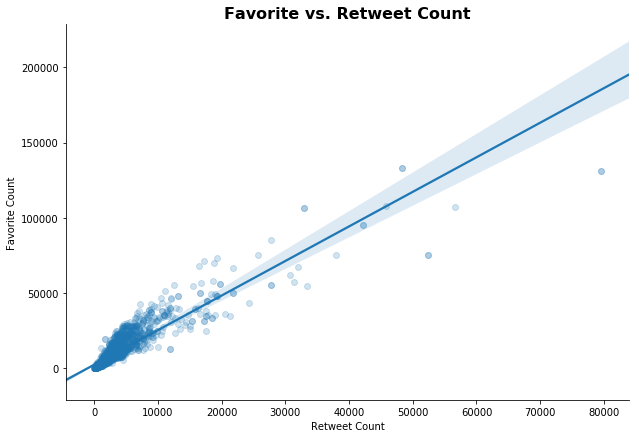

In [43]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_merge,
           size = 6,
           aspect=1.5,
           scatter_kws={'alpha':0.2})
plt.title('Favorite vs. Retweet Count', weight='bold', fontsize=16)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts relationship is highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

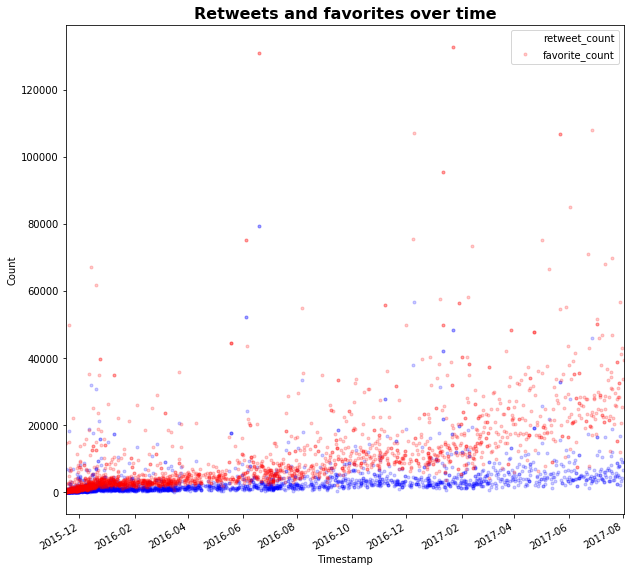

In [44]:
ax = df_merge.plot(x="timestamp", y="retweet_count", color="blue", figsize=(10,10), style = '.', alpha = .2)
df_merge.plot(x="timestamp", y="favorite_count", ax=ax, color="red", figsize=(10,10), style = '.', alpha = .2)
plt.title('Retweets and favorites over time', weight='bold', fontsize=16)
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()

Both favorite_count and retweet_count are increasing with time but favorite_count a little more.

In [45]:
dogstages_count = df_merge.dog_stage.value_counts()
df_merge.dog_stage.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stage, dtype: int64

Text(0.5,1,'Repartition of dog stages')

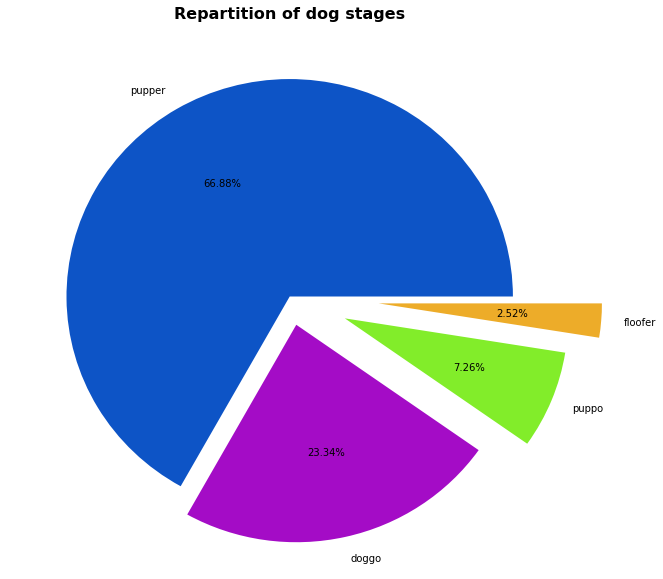

In [46]:
dogstages_count = df_merge['dog_stage'].value_counts()

# Shows the repartition of the dog stages with a pie chart.
explode = np.linspace(0,0.4,4)
colors = ['#0d54c6', '#a40cc6', '#82ed2a','#edac29']
dogstages_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Repartition of dog stages', weight='bold', fontsize=16)

Pupper is the most owned dog.